# Application 3: Loan Eligibility Prediction

Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## Dataset

CSV containing the customers for whom loan eligibility is known.

**Variable** | **Description**

- Loan_ID | Unique Loan ID
- Gender | Male / Female
- Married | Applicant married (Y / N)
- Dependents | Number of dependents
- Education | Applicant Education (Graduate / Under Graduate)
- Self_Employed | Self employed (Y / N)
- ApplicantIncome | Applicant income
- CoapplicantIncome | Coapplicant income
- LoanAmount | Loan amount in thousands
- Loan_Amount_Term | Term of loan in months
- Credit_History | credit history meets guidelines
- Property_Area | Urban / Semi Urban / Rural
- Loan_Status | (**Target**) Loan approved (Y/N)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, metrics 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.shape

(614, 13)

In [7]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
150,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural,N
330,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
225,LP001751,Male,Yes,0,Graduate,No,3250,0.0,170.0,360.0,1.0,Rural,N
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N


In [8]:
data.describe() #Works only for numerical features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually.

- For categorical features, we can use the frequency table or bar plots which will calculate the number of each category in a particular variable.
- For numerical features, probability density plots can be used to look at the distribution of the variable.

In [9]:
# Target Variable - Loan_Status

In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

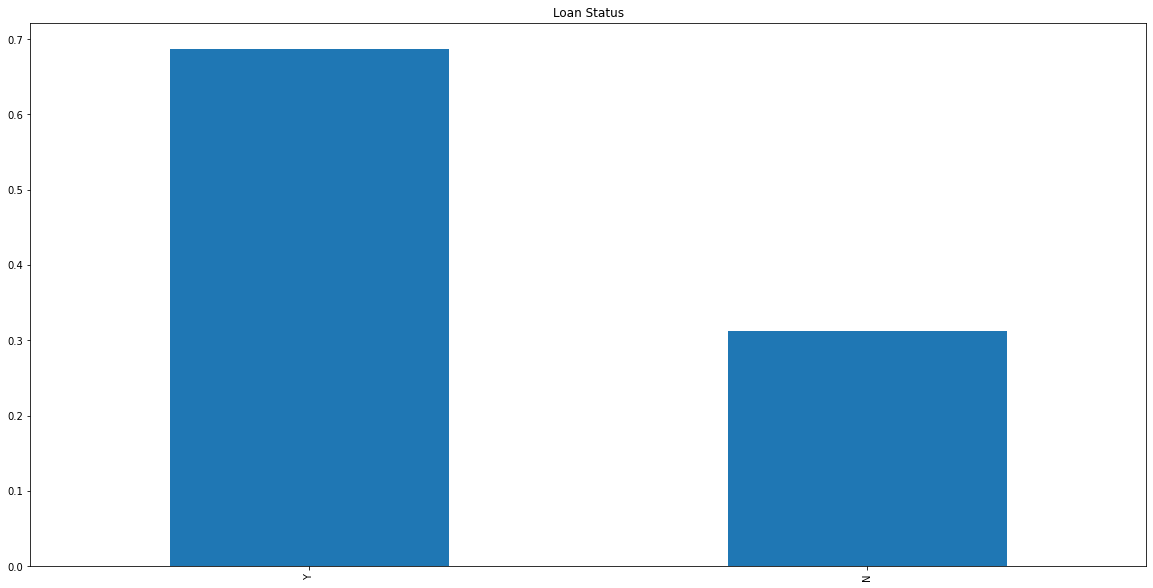

In [12]:
plt.figure(figsize=(20,10))
data['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan Status')
plt.show()

Inference: 68.72% of the loan applications in the dataset were approved.

In [13]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# There are three types of features:

# 1) Categorial - features having categories
# Examples: Gender, Married, Self_Employed, Credit_History

# 2) Ordinal - categorical features having some order involved
# Examples: Dependents, Education, Property_Area

# 3) Numerical - features having numerical values
# Examples: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

In [15]:
# Categorical Varibales

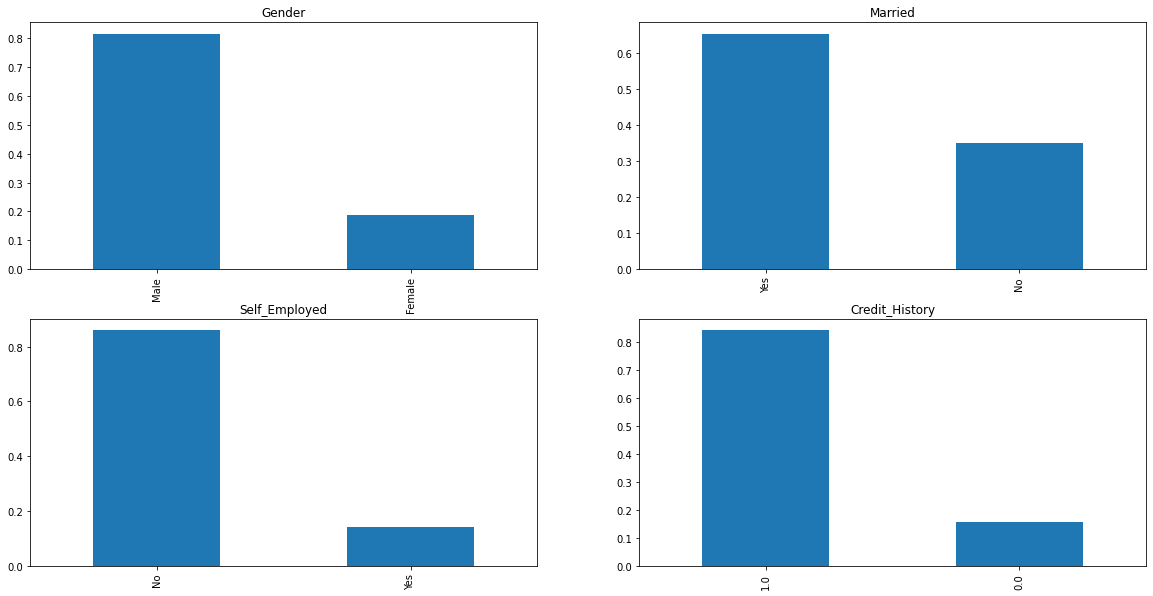

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(221)
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

Inference:
    
- Around 80% applicants in the dataset are male
- Around 65% applicants in the dataset are married
- Around 85% applicants in the dataset are employed
- Around 85% applicants have repaid their past debts

In [17]:
# Ordinal Variables

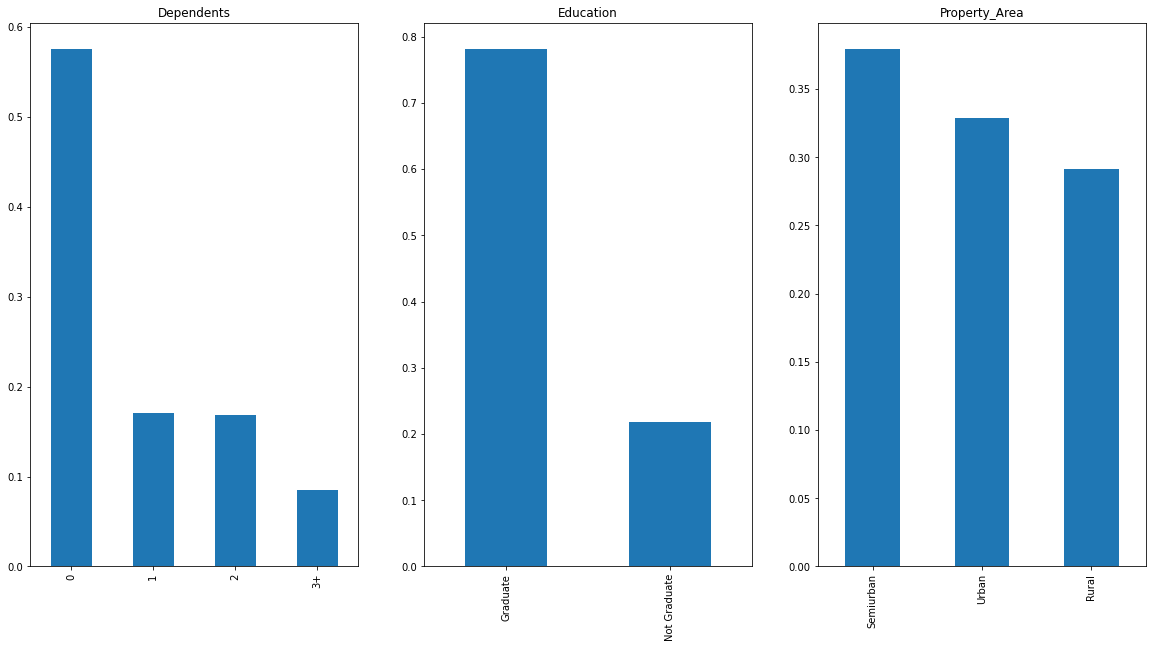

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(131)
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Inference:
    
- Most of the applicants don't have any dependants
- Most of the applicants are graduates.
- Most of the applicants are from semiurban areas.

In [19]:
# Numerical Variables

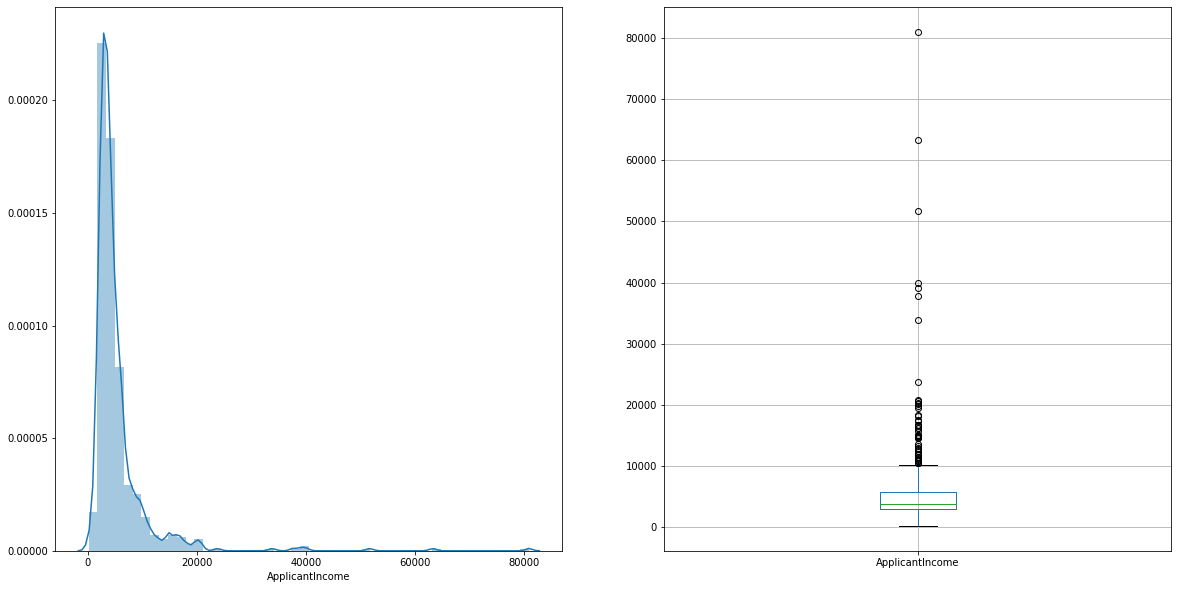

In [20]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'])
plt.subplot(122)
data.boxplot(column='ApplicantIncome')
plt.show()

**Inference - 'ApplicantIncome'**

- It can be inferred that most of the data in the distribution of applicant incomes is towards left, i.e. it is not normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

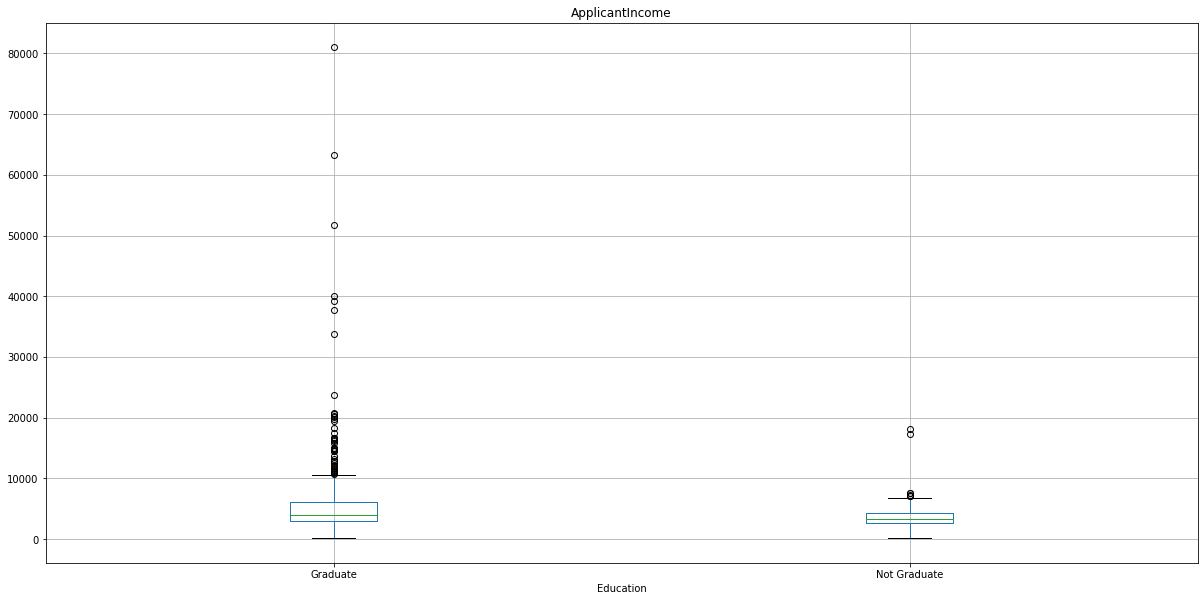

In [21]:
data.boxplot(column='ApplicantIncome', by='Education', figsize=(20, 10))
plt.suptitle("")
plt.show()

We can see that there is a large number of graduates with very high incomes, which are appearing to be the outliers.

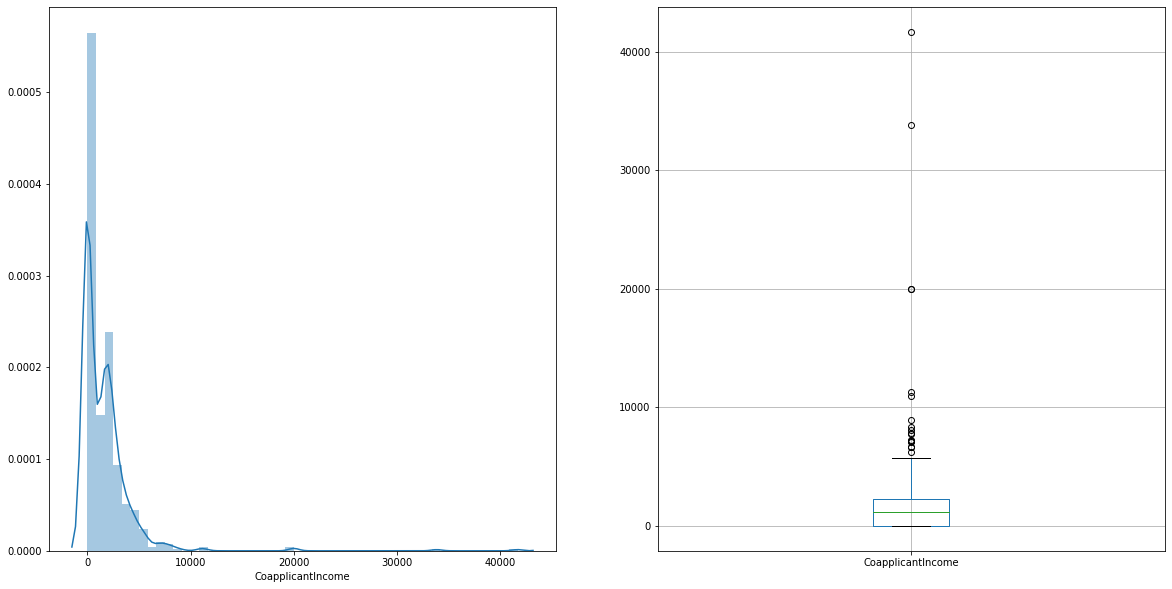

In [22]:
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'])
plt.subplot(122)
data.boxplot(column='CoapplicantIncome')
plt.show()

**Inference - 'CoapplicantIncome'**

- It can be inferred that most of the data in the distribution of coapplicant incomes is towards left, i.e. it is not normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreme values.

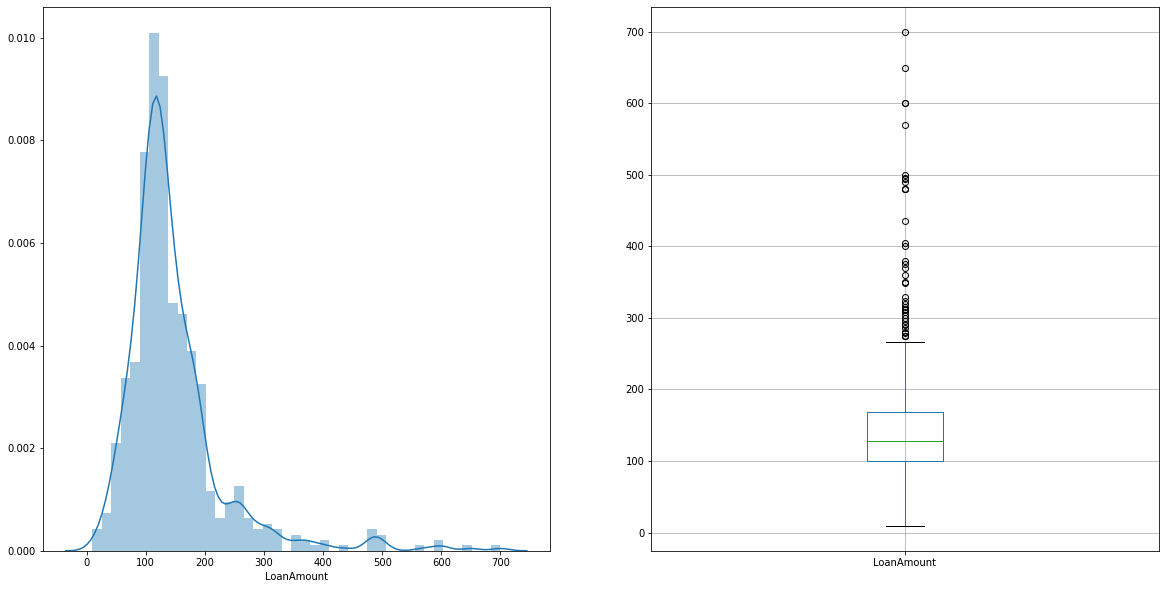

In [23]:
# LoanAmount

plt.figure(1, figsize=(20, 10))
plt.subplot(121)
sns.distplot(data['LoanAmount'])
plt.subplot(122)
data.boxplot(column='LoanAmount')
plt.show()

**Inference - 'LoanAmount'**

- It can be inferred that most of the data is normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreme values.

### Bivariate Analysis

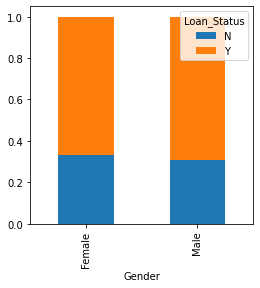

In [24]:
# crosstab computes a simple cross tabulation of two (or more) factors 
Gender = pd.crosstab(data[ 'Gender'], data['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", 
                                                     stacked = True, 
                                                     figsize = (4,4))
plt.show()

### Missing Value and Outlier Treatment

We need to impute the missing values and treat theoutliers because missing data and outliers can have adverse effect on the model performance. 

**Missing value imputation**

In [25]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can consider these methods to fill the missing values: 
- For numerical variables: imputation using mean or median 
- For categorical variables: imputation using mode 

In [26]:
data['Gender'].fillna(
    data[ 'Gender'].mode()[0], 
    inplace=True
) 

data['Married'].fillna(
    data['Married'].mode()[0], 
    inplace=True
) 

data['Dependents'].fillna(
    data[ 'Dependents'].mode()[0], 
    inplace=True
) 

data['Self_Employed'].fillna(
    data['Self_Employed'].mode()[0], 
    inplace=True
) 

data['Credit_History'].fillna(
    data['Credit_History'].mode()[0], 
    inplace=True
) 

data['Loan_Amount_Term'].fillna(
    data[ 'Loan_Amount_Term' ].mode()[0], 
    inplace=True
) 

In [27]:
data['LoanAmount'].fillna(
    data['LoanAmount'].median(), 
    inplace=True
) 

In [28]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Outlier Treatments**

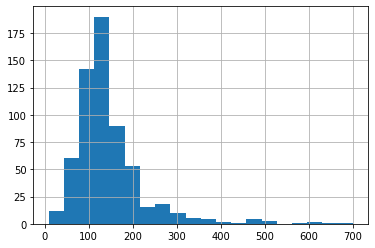

In [29]:
data['LoanAmount'].hist(bins=20)
plt.show()

Due to the outliers, bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. 

One way to remove the skewness is by doing the log transformation. 

As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution

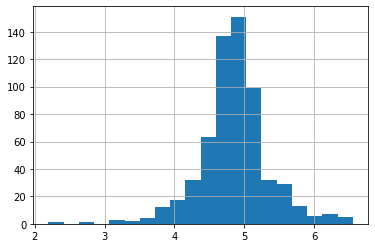

In [30]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)
plt.show()

### Model Building : Part I

Lets drop the Loan_ID variable as it do not have any effect on the loan status.

In [31]:
data = data.drop('Loan_ID', axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable
from the data dataset and save it in another dataset.

In [32]:
X = data.drop('Loan_Status', 1) 
y = data.Loan_Status

Now we will make dummy variables for the categorical variables.

In [33]:
X = pd.get_dummies(X) 

In [34]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [36]:
X_train.shape, Y_train.shape

((429, 21), (429,))

In [37]:
X_test.shape, Y_test.shape

((185, 21), (185,))

### Multinomial Naive Bayes Classifier

In [38]:
mlt_classifier = MultinomialNB()

In [39]:
# mlt_classifier.fit(X_train, Y_train)
# # ValueError: Negative values in data passed to MultinomialNB (input X)
# y_pred = mlt_classifier.predict(X_test)

In [40]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
svc_classifier = SVC()
classifiers.append(svc_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
rf_classifier = RandomForestClassifier()
classifiers.append(rf_classifier)

In [41]:
for classifier in classifiers:
    print(classifier)
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print(metrics.classification_report(Y_test, y_pred))
    print("----")

LogisticRegression()
              precision    recall  f1-score   support

           N       0.76      0.42      0.54        66
           Y       0.74      0.92      0.82       119

    accuracy                           0.75       185
   macro avg       0.75      0.67      0.68       185
weighted avg       0.75      0.75      0.72       185

----
LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

           N       0.93      0.41      0.57        66
           Y       0.75      0.98      0.85       119

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.81      0.78      0.75       185

----
SVC()
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        66
           Y       0.64      1.00      0.78       119

    accuracy                           0.64       185
   macro avg       0.32      0.50      0.39       185
weighted

### Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target
variable. We will create the following three new features:

- Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

- EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with resepect to loan amount term.

- Balance Income -  This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


**Total Income**

In [42]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

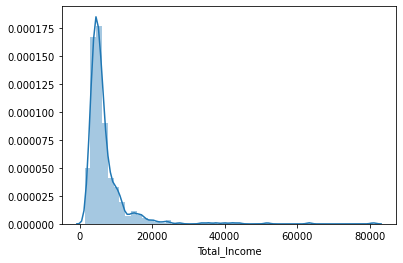

In [43]:
sns.distplot(data['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

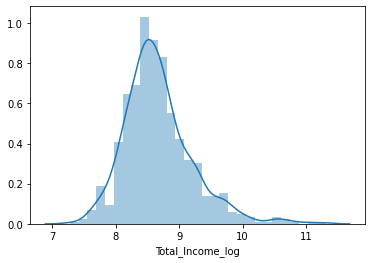

In [44]:
data['Total_Income_log'] = np.log(data['Total_Income'])
sns.distplot(data['Total_Income_log'])
plt.show()

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

**EMI**

<AxesSubplot:xlabel='EMI'>

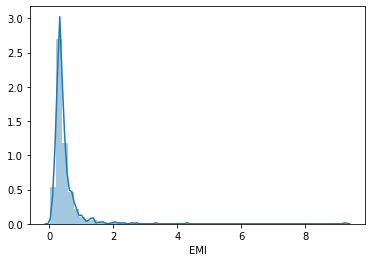

In [45]:
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
sns.distplot(data['EMI'])

<AxesSubplot:xlabel='EMI_log'>

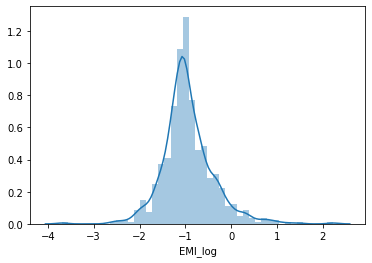

In [46]:
data['EMI_log'] = np.log(data['EMI'])
sns.distplot(data['EMI_log'])

**Balance Income**

<AxesSubplot:xlabel='Balance Income'>

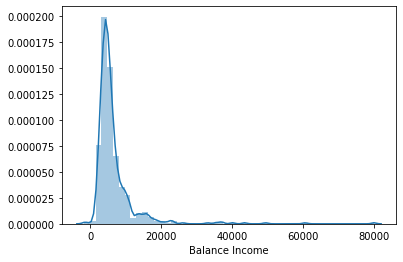

In [47]:
data['Balance Income'] = data['Total_Income'] - (data['EMI'] * 1000) #Multiply with 1000 to make the units equal
sns.distplot(data['Balance Income'])

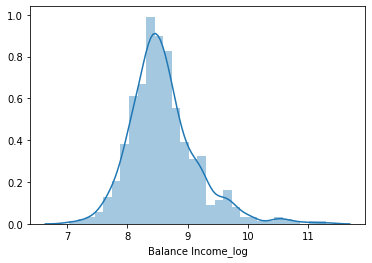

In [48]:
data['Balance Income_log'] = np.log(data['Balance Income'])
sns.distplot(data['Balance Income_log']);

- We would now drop the variables which we used to create these new features. 

- Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 

- We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [49]:
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [50]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
Total_Income          0
Total_Income_log      0
EMI                   0
EMI_log               0
Balance Income        0
Balance Income_log    2
dtype: int64

In [51]:
data['Balance Income_log'].fillna(
    data['Balance Income_log'].median(), 
    inplace=True
) 

In [52]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
Total_Income          0
Total_Income_log      0
EMI                   0
EMI_log               0
Balance Income        0
Balance Income_log    0
dtype: int64

### Model Building Part II

In [53]:
X = data.drop('Loan_Status', 1) 
y = data.Loan_Status

Now we will make dummy variables for the categorical variables.

In [54]:
X = pd.get_dummies(X) 

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [56]:
X_train.shape, Y_train.shape

((429, 23), (429,))

In [57]:
X_test.shape, Y_test.shape

((185, 23), (185,))

In [58]:
classifiers = []

lr_classifier = LogisticRegression()
classifiers.append(lr_classifier)
lda_classifier = LinearDiscriminantAnalysis()
classifiers.append(lda_classifier)
svc_classifier = SVC()
classifiers.append(svc_classifier)
kn_classifier = KNeighborsClassifier()
classifiers.append(kn_classifier)
gnb_classifier = GaussianNB()
classifiers.append(gnb_classifier)
dt_classifier = DecisionTreeClassifier()
classifiers.append(dt_classifier)
rf_classifier = RandomForestClassifier()
classifiers.append(rf_classifier)

In [59]:
for classifier in classifiers:
    print(type(classifier))
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
    print("Precision:",metrics.precision_score(Y_test, y_pred, pos_label='Y'))
    print("Recall:",metrics.recall_score(Y_test, y_pred, pos_label='Y'))
    print("----")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.6432432432432432
Precision: 0.6467391304347826
Recall: 0.9916666666666667
----
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
Accuracy: 0.7945945945945946
Precision: 0.7733333333333333
Recall: 0.9666666666666667
----
<class 'sklearn.svm._classes.SVC'>
Accuracy: 0.6486486486486487
Precision: 0.6486486486486487
Recall: 1.0
----
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.6
Precision: 0.6513157894736842
Recall: 0.825
----
<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.7567567567567568
Precision: 0.7697841726618705
Recall: 0.8916666666666667
----
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.6972972972972973
Precision: 0.7807017543859649
Recall: 0.7416666666666667
----
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 0.7513513513513513
Precision: 0.7803030303030303
Recall: 0.8583333333333333
----


In [60]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [61]:
dt_classifier.feature_importances_

array([0.28823787, 0.07060075, 0.08464469, 0.04604804, 0.07896419,
       0.08702237, 0.10092715, 0.11251579, 0.01597896, 0.00466053,
       0.01158575, 0.01198422, 0.00186421, 0.00838896, 0.00811687,
       0.01385372, 0.        , 0.00178964, 0.028944  , 0.0050748 ,
       0.00838896, 0.00248562, 0.0079229 ])

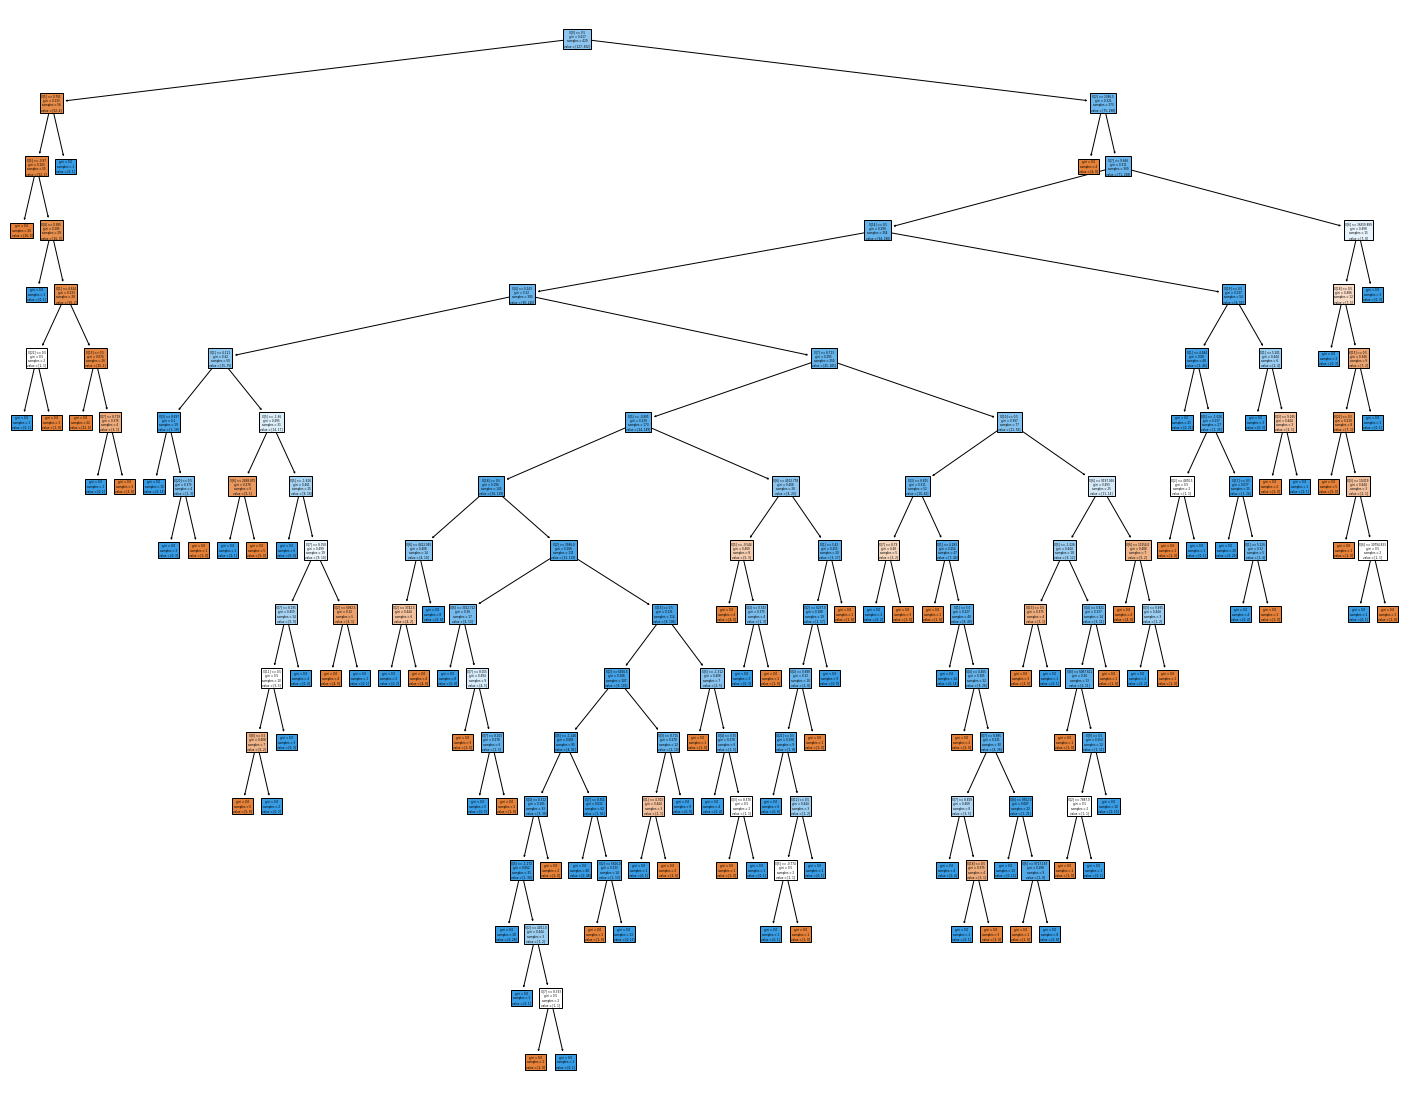

In [62]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_classifier, 
              filled=True)
plt.show()

In [63]:
fig.savefig("decision_tree.png")

## Random Forest

Accuracy: 0.7513513513513513
Precision: 0.7642857142857142
Recall: 0.8916666666666667


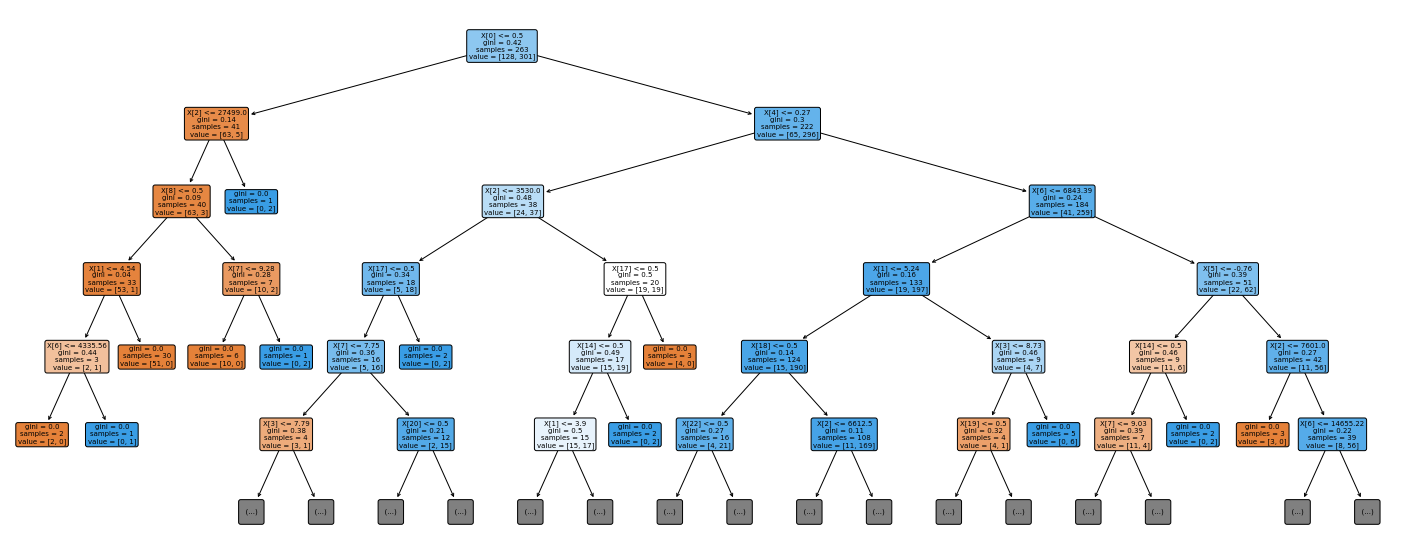

In [64]:
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred,  pos_label='Y'))
print("Recall:",metrics.recall_score(Y_test, y_pred,  pos_label='Y'))
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[0], 
                  max_depth = 5,
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

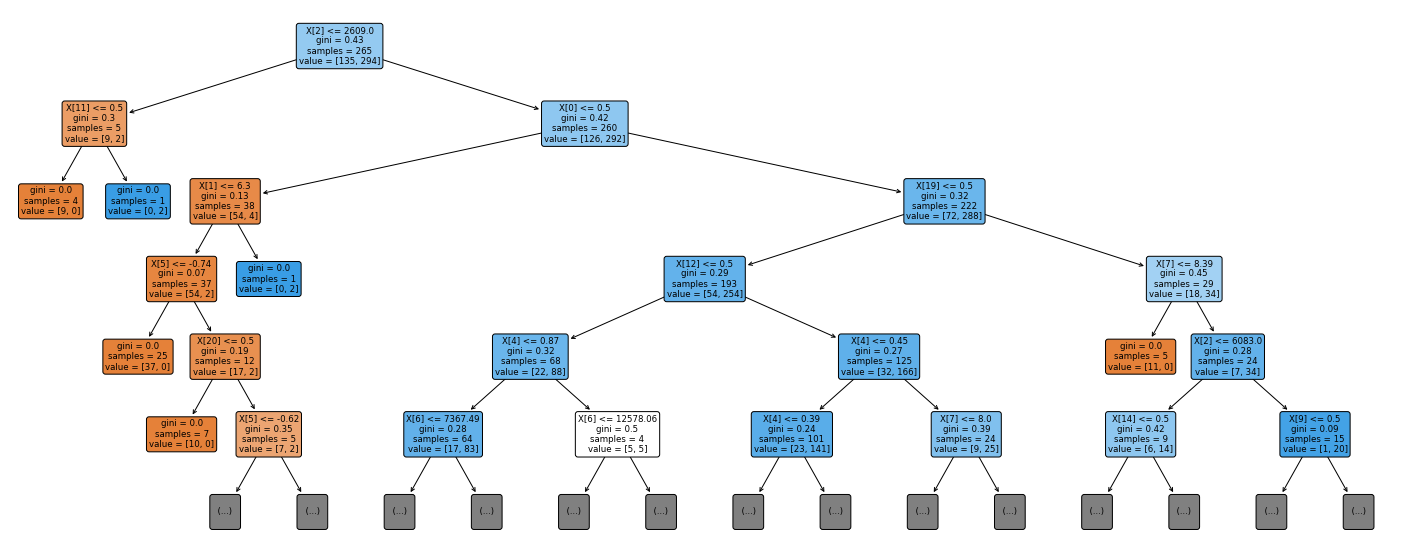

In [65]:
fig = plt.figure(figsize=(25,10))
plot_tree(rf_classifier.estimators_[1], 
                  max_depth = 5,
                  rounded = True, 
                  precision = 2,
                  filled = True,
                  )
plt.show()

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,EMI_log,Balance Income,Balance Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,-1.034074,5493.444444,8.611311
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,-1.034074,5735.444444,8.654421
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,-1.696449,2816.666667,7.943309
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,0.333333,-1.098612,4607.666667,8.435477
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,0.391667,-0.937344,5608.333333,8.632009


In [67]:
age = widgets.Text(description="age")
sex = widgets.Text(description="sex")
cp = widgets.Text(description="cp")
trestbps = widgets.Text(description="trestbps")
chol = widgets.Text(description="chol")
fbs = widgets.Text(description="fbs")
restecg = widgets.Text(description="restecg")
thalach = widgets.Text(description="thalach")
exang = widgets.Text(description="exang")
oldpeak = widgets.Text(description="oldpeak")
slope = widgets.Text(description="slope")
ca = widgets.Text(description="ca")
thal = widgets.Text(description="thal")

In [68]:
display(age)
display(sex)
display(cp)
display(trestbps)
display(chol)
display(fbs)
display(restecg)
display(thalach)
display(exang)
display(oldpeak)
display(slope)
display(ca)
display(thal)

Text(value='', description='age')

Text(value='', description='sex')

Text(value='', description='cp')

Text(value='', description='trestbps')

Text(value='', description='chol')

Text(value='', description='fbs')

Text(value='', description='restecg')

Text(value='', description='thalach')

Text(value='', description='exang')

Text(value='', description='oldpeak')

Text(value='', description='slope')

Text(value='', description='ca')

Text(value='', description='thal')

In [69]:
algorithm = widgets.Dropdown(
    options = [('Logistic Regression', 'LR'), 
               ('Linear Discriminant Analysis ', 'LDA'), 
               ('Support Vector Machines', 'SVM'),
               ('K-Nearest Neighbors', 'KN'),
               ('Naive Bayes', 'NB'),
               ('Decision Trees', 'DT'),
               ('Random Forest', 'RF'),
              ],
    disabled = False,
)

print('Select Algorithm')
display(algorithm)

Select Algorithm


Dropdown(options=(('Logistic Regression', 'LR'), ('Linear Discriminant Analysis ', 'LDA'), ('Support Vector Ma…

In [70]:
prediction = widgets.Output()

button_predict = widgets.Button(description="Predict")

def on_button_predict_clicked(b):
    
    input_data = {}
    input_data['age'] = float(age.value)
    input_data['sex'] = float(sex.value)
    input_data['cp'] = float(cp.value)
    input_data['trestbps'] = float(trestbps.value)
    input_data['chol'] = float(chol.value)
    input_data['fbs'] = float(fbs.value)
    input_data['restecg'] = float(restecg.value)
    input_data['thalach'] = float(thalach.value)
    input_data['exang'] = float(exang.value)
    input_data['oldpeak'] = float(oldpeak.value)
    input_data['slope'] = float(slope.value)
    input_data['ca'] = float(ca.value)
    input_data['thal'] = float(thal.value)
    
    user_input = pd.DataFrame(input_data, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], index=[0])
    
    selected_algorithm = algorithm.value
    
    if selected_algorithm == 'LR':
        classifier = lr_classifier
    elif selected_algorithm == 'LDA':
        classifier = lda_classifier
    elif selected_algorithm == 'SVM':
        classifier = svc_classifier        
    elif selected_algorithm == 'KN':
        classifier = kn_classifier
    elif selected_algorithm == 'NB':
        classifier = gnb_classifier
    elif selected_algorithm == 'DT':
        classifier = dt_classifier
    elif selected_algorithm == 'RF':
        classifier = rf_classifier
        
    with prediction:
        clear_output(True)
        print(f'Selected Algorithm = {selected_algorithm}')
        print(classifier.predict(user_input)[0])
        
button_predict.on_click(on_button_predict_clicked)

In [71]:
display(button_predict)
display(prediction)

Button(description='Predict', style=ButtonStyle())

Output()